# Attempting CIFAR10 with (just) a Multilayered Perceptron

Step 0

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

/home/arjun/AI_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform = transforms.ToTensor()
batch_size = 50000
num_epoch = 100
lr = 7e-4
hidden_size1 = 1536 
hidden_size2 = 768
hidden_size3 = 384
hidden_size4 = 96


In [4]:
train_dataset = torchvision.datasets.CIFAR10('/home/arjun/Desktop/Datasets', train=True, transform=transform, download=True)
test_dataset =  torchvision.datasets.CIFAR10('/home/arjun/Desktop/Datasets', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
print(len(train_dataset), len(test_dataset))

50000 10000


In [6]:
tot_steps = len(train_loader)  # Or the total number of batches

# One step is one batch calculation
tot_steps

1

In [7]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
for batch in train_loader:
    image, label = batch

(batch[0]).shape


torch.Size([50000, 3, 32, 32])

In [9]:
# print(classes[label[0]])
# plt.imshow(image[0][0])
# plt.show()

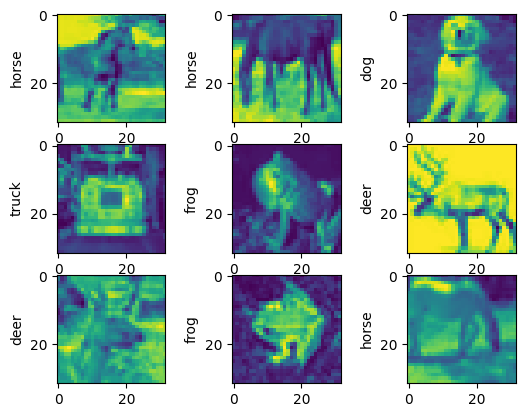

In [10]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image[i][0])
    plt.ylabel(classes[label[i]])

Step 1

In [11]:
class CIFAR10_NN(nn.Module):
    def __init__(self, inp_size, hidden_size1, hidden_size2, hidden_size3,hidden_size4, out_size):
        super(CIFAR10_NN, self).__init__()
        self.lay1 = nn.Linear(inp_size, hidden_size1)
        self.lay2 = nn.ReLU()
        self.lay3 = nn.Linear(hidden_size1, hidden_size2)
        self.lay4 = nn.ReLU()
        self.lay5 = nn.Linear(hidden_size2, hidden_size3)
        self.lay6 = nn.ReLU()
        self.lay7 = nn.Linear(hidden_size3, hidden_size4)
        self.lay8 = nn.ReLU()
        self.lay9 = nn.Linear(hidden_size4, out_size)
        
    def forward(self, X):
        out = self.lay1(X)  
        out = self.lay2(out)
        out = self.lay3(out)
        out = self.lay4(out)
        out = self.lay5(out)
        out = self.lay6(out)
        out = self.lay7(out)
        out = self.lay8(out)
        out = self.lay9(out)
        return out
    
model = CIFAR10_NN(3*32*32, hidden_size1, hidden_size2, hidden_size3, hidden_size4, 10).to(device)

In [12]:
print(model)

CIFAR10_NN(
  (lay1): Linear(in_features=3072, out_features=1536, bias=True)
  (lay2): ReLU()
  (lay3): Linear(in_features=1536, out_features=768, bias=True)
  (lay4): ReLU()
  (lay5): Linear(in_features=768, out_features=384, bias=True)
  (lay6): ReLU()
  (lay7): Linear(in_features=384, out_features=96, bias=True)
  (lay8): ReLU()
  (lay9): Linear(in_features=96, out_features=10, bias=True)
)


Step 2

In [13]:
lossCat = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=lr)

Step 3

In [14]:
num_steps_in_a_batch = len(train_dataset)/batch_size
for epoch in range(num_epoch):
    for step, (images, labels) in enumerate(train_loader):
        images = images[:,:,:,:].reshape(batch_size,-1).to(device)
        labels = labels.to(device)

        y_hat = model(images)
        loss = lossCat(y_hat, labels)
        loss.backward()
        optimiser.step()
        optimiser.zero_grad()

        if step == num_steps_in_a_batch - 1:
            print(f"Epoch {epoch+1}  Loss:{loss}")

Epoch 1  Loss:2.305713415145874
Epoch 2  Loss:2.300328016281128
Epoch 3  Loss:2.2870054244995117
Epoch 4  Loss:2.2698006629943848
Epoch 5  Loss:2.247222423553467
Epoch 6  Loss:2.237246036529541
Epoch 7  Loss:2.236483335494995
Epoch 8  Loss:2.1900782585144043
Epoch 9  Loss:2.1695194244384766
Epoch 10  Loss:2.1665236949920654
Epoch 11  Loss:2.1259617805480957
Epoch 12  Loss:2.1313204765319824
Epoch 13  Loss:2.1071596145629883
Epoch 14  Loss:2.087488889694214
Epoch 15  Loss:2.0897905826568604
Epoch 16  Loss:2.063344717025757
Epoch 17  Loss:2.0534889698028564
Epoch 18  Loss:2.041598081588745
Epoch 19  Loss:2.0261621475219727
Epoch 20  Loss:2.032343626022339
Epoch 21  Loss:2.012179136276245
Epoch 22  Loss:2.0106492042541504
Epoch 23  Loss:1.9913407564163208
Epoch 24  Loss:1.9808729887008667
Epoch 25  Loss:1.9744973182678223
Epoch 26  Loss:1.9653351306915283
Epoch 27  Loss:1.9645040035247803
Epoch 28  Loss:1.9494444131851196
Epoch 29  Loss:1.9459220170974731
Epoch 30  Loss:1.9338958263397217

Step 4

In [15]:
with torch.no_grad():
    tot_sample, correct_sample = 0,0
    for sample, target in train_loader:  
            sample = sample[:,:,:,:].resize(batch_size, 3*32*32).to(device)
            target = target.to(device)

            out = model(sample)
            _, prediction = torch.max(out,1)
            
            tot_sample += batch_size
            correct_sample += ((prediction == target).sum()).item()

/home/arjun/AI_ENV/lib/python3.10/site-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [16]:
print(prediction, target)

tensor([7, 8, 7,  ..., 6, 4, 7], device='cuda:0') tensor([6, 8, 7,  ..., 6, 4, 7], device='cuda:0')


In [17]:
print(f"Train Accuracy = {(correct_sample/tot_sample)*100:.3f}")

Train Accuracy = 39.380


In [18]:
batch_size = 10000

In [19]:
with torch.no_grad():
    tot_sample, correct_sample = 0,0
    for sample, target in test_loader:  
            sample = sample[:,:,:,:].resize(batch_size, 3*32*32).to(device)
            target = target.to(device)

            out = model(sample)
            _, prediction = torch.max(out,1)
            
            tot_sample += batch_size
            correct_sample += ((prediction == target).sum()).item()

In [20]:
print(f"Test Accuracy = {(correct_sample/tot_sample)*100:.3f}")

Test Accuracy = 39.780


Best Accuracy = 44.5 %

Well, guess that's why CNNs are used. 😆